# Crux:
1) totalSales is weakly affected by weather<br>
2) Among weather parameters, main factors are max temperature, min temperature 
   and precipitation.<br>
3) Department4 is most affected by the max temperature.
4) Department4 is most affected by the min temperature.
5) Department2 is most affected by the max precipitation.
6) Kelowna is an outlier as precipitation values are incorrect.
7) Precipitation and totalSales have inverse relationship.
8) totalSales and totalQuantity have linear relationship.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('trendcast_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,province,city,date,totalQuantity,totalSales,department1,department2,department3,department4,...,department12,department13,department14,temperature_min,temperature_max,precipitation,winddirection,windspeed,peakgust,pressure
0,0,AB,medicine hat,2014-01-01,5.0,2175.080796,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,-16.6,-3.0,0.5,206.0,7.5,126.0,1028.3
1,1,AB,medicine hat,2014-01-02,57.0,13543.752146,6.0,31.0,10.0,3.0,...,4.0,0.0,0.0,-18.0,5.0,0.5,206.0,19.3,126.0,1011.6
2,2,AB,medicine hat,2014-01-03,23.0,4489.217330,0.0,10.0,0.0,0.0,...,8.0,0.0,0.0,-11.3,5.0,0.5,302.0,23.7,126.0,1006.8
3,3,AB,medicine hat,2014-01-04,62.0,12135.622549,7.0,33.0,7.0,7.0,...,5.0,0.0,0.0,-22.0,-12.0,0.5,287.0,18.2,126.0,1032.9
4,4,AB,medicine hat,2014-01-05,26.0,5596.059495,3.0,12.0,4.0,1.0,...,3.0,0.0,0.0,-31.0,-21.0,0.5,221.0,15.3,126.0,1046.4


In [4]:
df.shape

(51110, 27)

In [5]:
df=df.drop(['Unnamed: 0','department14'],axis=1)

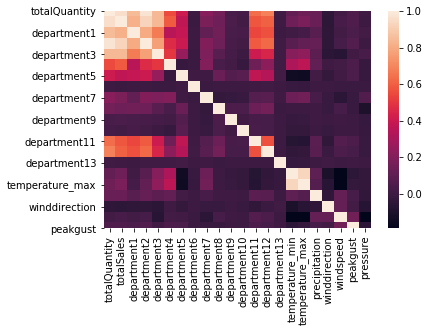

In [6]:
sns.heatmap(df.corr())

In [7]:
#sns.pairplot(df,kind='reg')

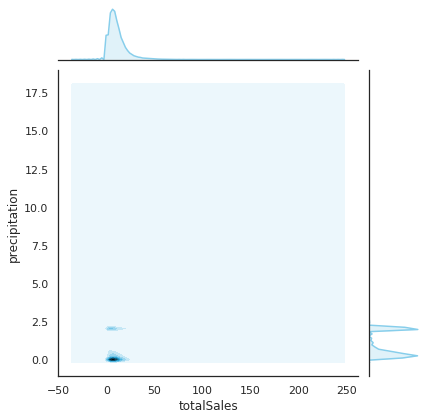

In [8]:
sale=df['totalSales']/1000
sns.set(style="white", color_codes=True)
g=sns.jointplot(y=df["precipitation"]/10, x=sale, kind='kde', color="skyblue")

In [9]:
df.columns

Index(['province', 'city', 'date', 'totalQuantity', 'totalSales',
       'department1', 'department2', 'department3', 'department4',
       'department5', 'department6', 'department7', 'department8',
       'department9', 'department10', 'department11', 'department12',
       'department13', 'temperature_min', 'temperature_max', 'precipitation',
       'winddirection', 'windspeed', 'peakgust', 'pressure'],
      dtype='object')

In [10]:
df1= df[['totalSales','precipitation','windspeed','winddirection','peakgust','pressure','temperature_min','temperature_max']]

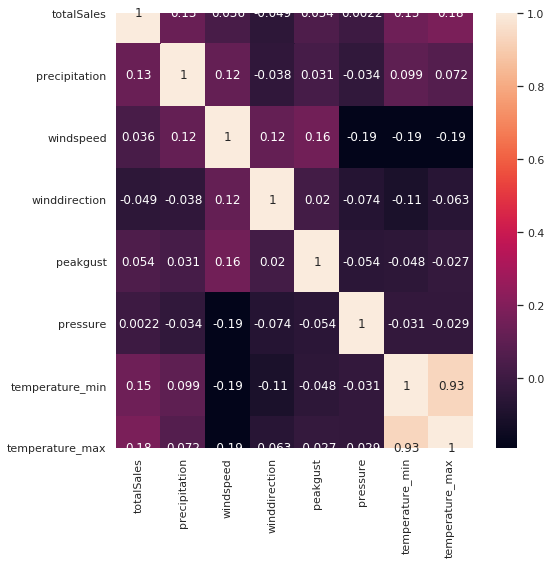

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True)

In [12]:
df.columns

Index(['province', 'city', 'date', 'totalQuantity', 'totalSales',
       'department1', 'department2', 'department3', 'department4',
       'department5', 'department6', 'department7', 'department8',
       'department9', 'department10', 'department11', 'department12',
       'department13', 'temperature_min', 'temperature_max', 'precipitation',
       'winddirection', 'windspeed', 'peakgust', 'pressure'],
      dtype='object')

In [13]:
impcols=df.columns[5:]

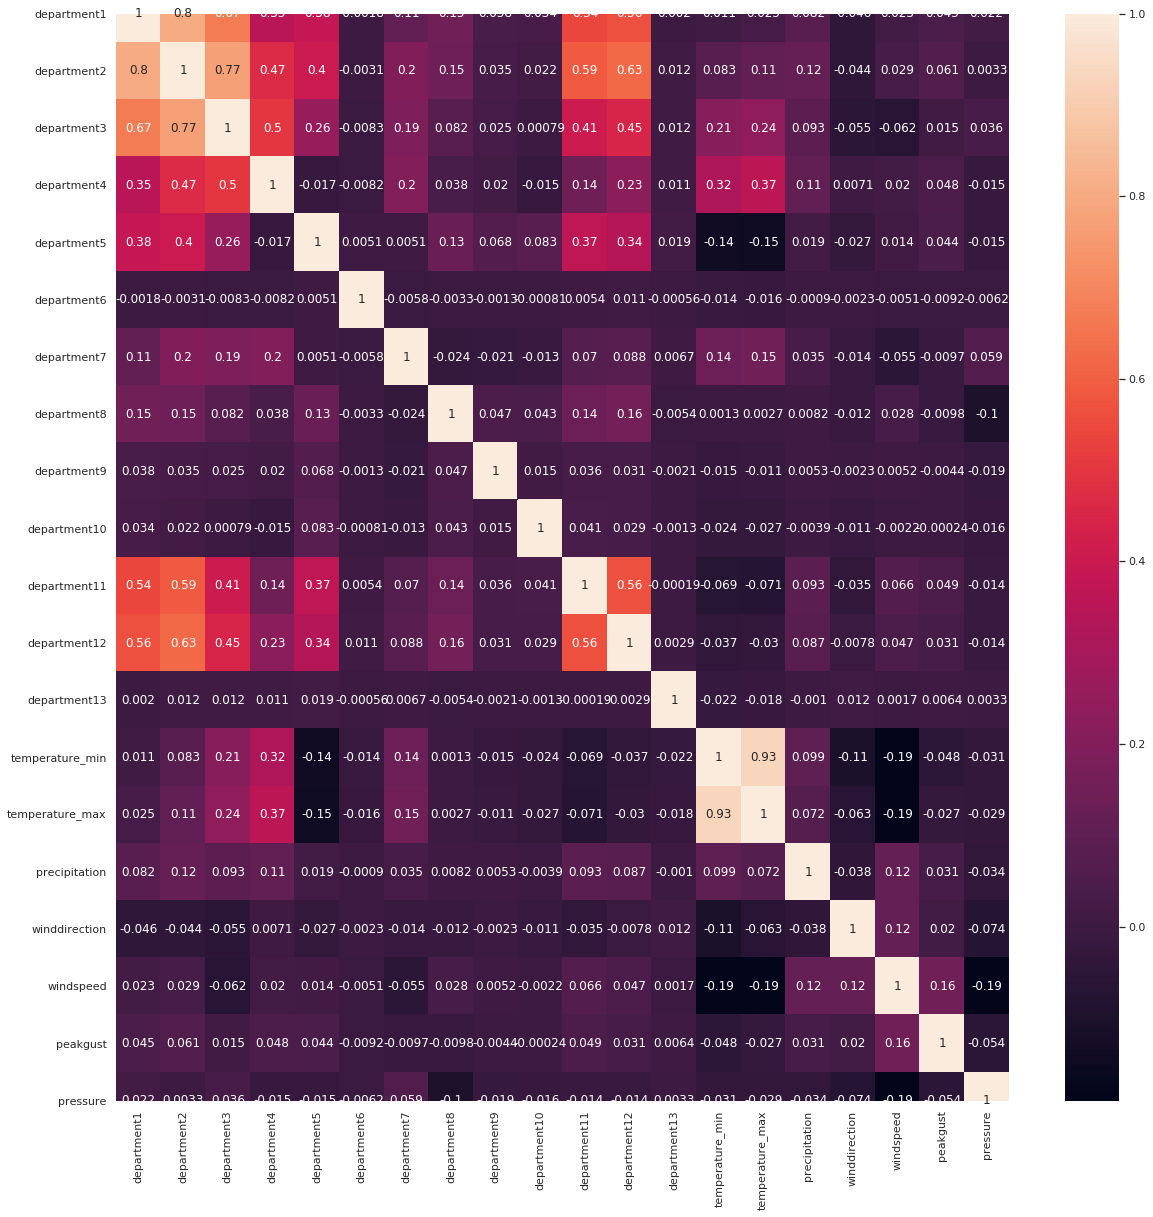

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df[impcols].corr(),annot=True)

In [15]:
dept_weather_corr=df[impcols].corr()*100

In [16]:
dept_weather_corr

,department1,department2,department3,department4,department5,department6,department7,department8,department9,department10,department11,department12,department13,temperature_min,temperature_max,precipitation,winddirection,windspeed,peakgust,pressure
department1,100.000000,80.326364,66.976562,35.310435,38.213128,-0.180703,11.133588,15.428362,3.805099,3.372601,53.973434,56.455220,0.199817,1.090008,2.521808,8.194029,-4.552910,2.291129,4.480664,2.215314
department2,80.326364,100.000000,77.038948,46.884350,40.417866,-0.305484,19.842715,14.659898,3.495022,2.234191,58.626674,62.629356,1.244672,8.332506,10.849194,12.317516,-4.387472,2.900182,6.056489,0.328345
department3,66.976562,77.038948,100.000000,49.809154,25.738832,-0.832620,18.628467,8.158243,2.522509,0.078576,40.689286,45.002655,1.191743,21.009000,23.756851,9.321866,-5.518099,-6.242829,1.544162,3.604053
department4,35.310435,46.884350,49.809154,100.000000,-1.687836,-0.822695,20.325887,3.780760,1.951140,-1.527693,14.178952,22.744897,1.119514,31.890214,36.667248,11.027321,0.708237,2.023251,4.830417,-1.488806
department5,38.213128,40.417866,25.738832,-1.687836,100.000000,0.507588,0.507063,13.251014,6.796730,8.347756,36.830625,33.982608,1.931956,-13.543172,-14.643656,1.900054,-2.662922,1.406405,4.433915,-1.472357
department6,-0.180703,-0.305484,-0.832620,-0.822695,0.507588,100.000000,-0.584937,-0.333562,-0.128425,-0.080796,0.537241,1.076834,-0.056344,-1.382254,-1.582341,-0.089649,-0.226669,-0.512804,-0.921534,-0.618494
department7,11.133588,19.842715,18.628467,20.325887,0.507063,-0.584937,100.000000,-2.422704,-2.144871,-1.349406,7.031857,8.809549,0.669766,13.851464,15.343522,3.510822,-1.358646,-5.532000,-0.968093,5.920683
department8,15.428362,14.659898,8.158243,3.780760,13.251014,-0.333562,-2.422704,100.000000,4.731603,4.337268,13.525654,16.206620,-0.536618,0.128467,0.272813,0.816637,-1.190139,2.790877,-0.976968,-10.189431
department9,3.805099,3.495022,2.522509,1.951140,6.796730,-0.128425,-2.144871,4.731603,100.000000,1.524582,3.608647,3.118154,-0.206603,-1.527312,-1.100745,0.532896,-0.226409,0.517865,-0.439007,-1.947405
department10,3.372601,2.234191,0.078576,-1.527693,8.347756,-0.080796,-1.349406,4.337268,1.524582,100.000000,4.132687,2.929414,-0.129981,-2.401769,-2.670146,-0.390610,-1.102275,-0.223329,-0.023746,-1.597291


# Department whose sales are affected by max temperature!


In [22]:
dept_affected_by_max_temp=dept_weather_corr.loc['temperature_max'][:13]

In [23]:
dept_affected_by_max_temp.sort_values(ascending=False)

department4     36.667248
department3     23.756851
department7     15.343522
department2     10.849194
department1      2.521808
department8      0.272813
department9     -1.100745
department6     -1.582341
department13    -1.752812
department10    -2.670146
department12    -2.978687
department11    -7.100566
department5    -14.643656
Name: temperature_max, dtype: float64

# Department whose sales are affected by min temperature !

In [17]:
dept_affected_by_min_temp=dept_weather_corr.loc['temperature_min'][:13]

In [18]:
dept_affected_by_min_temp.sort_values(ascending=False)

department4     31.890214
department3     21.009000
department7     13.851464
department2      8.332506
department1      1.090008
department8      0.128467
department6     -1.382254
department9     -1.527312
department13    -2.165231
department10    -2.401769
department12    -3.737923
department11    -6.932545
department5    -13.543172
Name: temperature_min, dtype: float64

# Department whose sales are affected by precipitation !

In [19]:
dept_affected_by_precipitation=dept_weather_corr.loc['precipitation'][:13]
dept_affected_by_precipitation.sort_values(ascending=False)

department2     12.317516
department4     11.027321
department3      9.321866
department11     9.253955
department12     8.692600
department1      8.194029
department7      3.510822
department5      1.900054
department8      0.816637
department9      0.532896
department6     -0.089649
department13    -0.102923
department10    -0.390610
Name: precipitation, dtype: float64

# Outlier detection !

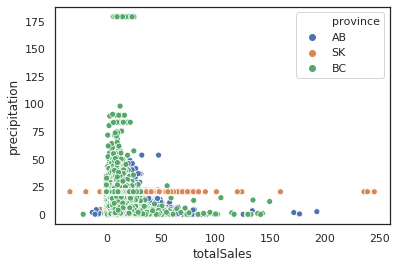

In [20]:
sns.scatterplot(y=df["precipitation"], x=sale,hue=df['province'])

In [21]:
# By cross-checking, We found that precipitation for kelowna isn't correct!

In [23]:
df[(df.province=='BC') & (df.precipitation>100)].head()

,province,city,date,totalQuantity,totalSales,department1,department2,department3,department4,department5,...,department11,department12,department13,temperature_min,temperature_max,precipitation,winddirection,windspeed,peakgust,pressure
25852,BC,kelowna,2015-08-07,46.0,9922.422493,7.0,31.0,1.0,5.0,0.0,...,0.0,1.0,0.0,7.8,29.3,179.1,181.0,3.9,133.2,1012.5
25853,BC,kelowna,2015-08-08,48.0,12183.219737,0.0,24.0,11.0,9.0,0.0,...,0.0,2.0,0.0,10.0,32.8,179.1,181.0,7.1,126.0,1008.3
25854,BC,kelowna,2015-08-09,29.0,5846.567369,2.0,18.0,4.0,4.0,0.0,...,1.0,0.0,0.0,12.0,31.7,179.1,181.0,7.2,133.2,1011.7
25855,BC,kelowna,2015-08-10,61.0,16141.188803,1.0,27.0,9.0,17.0,0.0,...,3.0,2.0,0.0,14.3,32.2,179.1,181.0,7.8,133.2,1012.2
25856,BC,kelowna,2015-08-11,46.0,12122.339613,5.0,19.0,10.0,9.0,0.0,...,0.0,3.0,0.0,14.4,33.1,179.1,181.0,7.8,180.0,1013.2


# Precipitation vs Department2 sales!

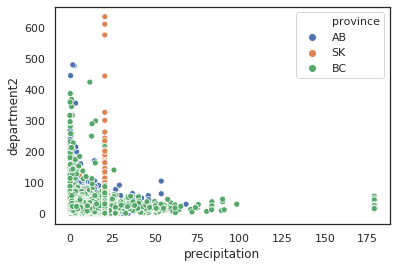

In [25]:
sns.scatterplot(x=df["precipitation"], y=df.department2,hue=df['province'])

In [26]:
#Note: If precipitation is high then Sales decreased!

# TotalSales vs totalQuantity (Shows a linear relationship!)

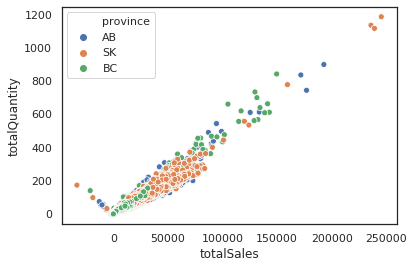

In [28]:
sns.scatterplot(x=df["totalSales"], y=df.totalQuantity,hue=df['province'])